In [1]:
%cd drive/MyDrive/Colab\ Notebooks/HouseholdDebt

/content/drive/MyDrive/Colab Notebooks/HouseholdDebt


# 한글세팅

In [2]:
!sudo apt-get update -qq
!sudo apt-get install fonts-nanum* -qq

In [3]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [4]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumBarunGothic


In [5]:
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
import seaborn as sns

In [7]:
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [8]:
import pandas as pd

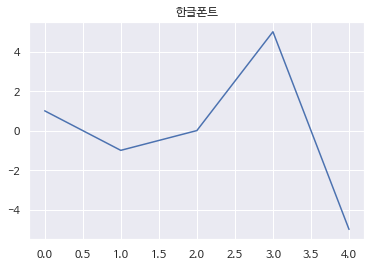

In [9]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")
None

# 30대 대출합계 VECM

In [10]:
import numpy as np
from statsmodels.tsa.vector_ar.vecm import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data load

In [11]:
df = pd.read_csv('data/all_macro_data.csv', index_col=0)

In [12]:
data = pd.read_csv('data/2110059_20220113180614.csv')
df['total_loan_30s'] = data[data['연령대'] == '30대'].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

In [13]:
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

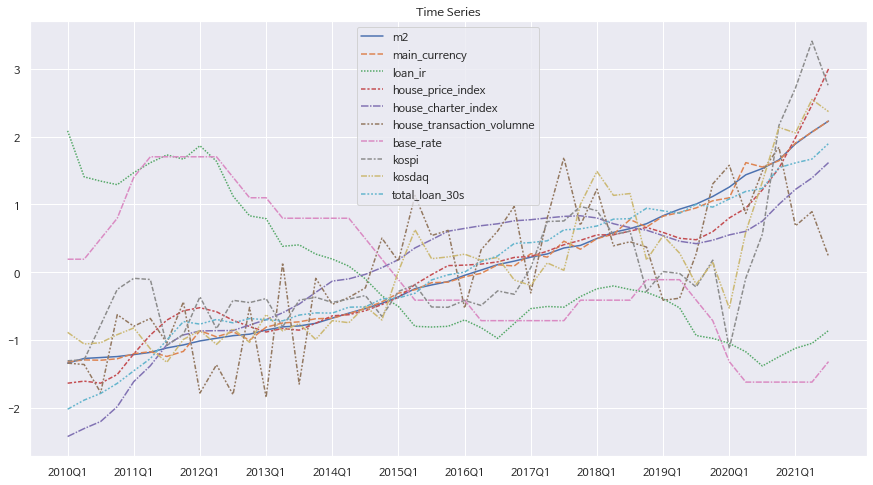

In [14]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [15]:
df = df.drop(columns=['main_currency', 'house_charter_index', 'kosdaq'])

In [ ]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

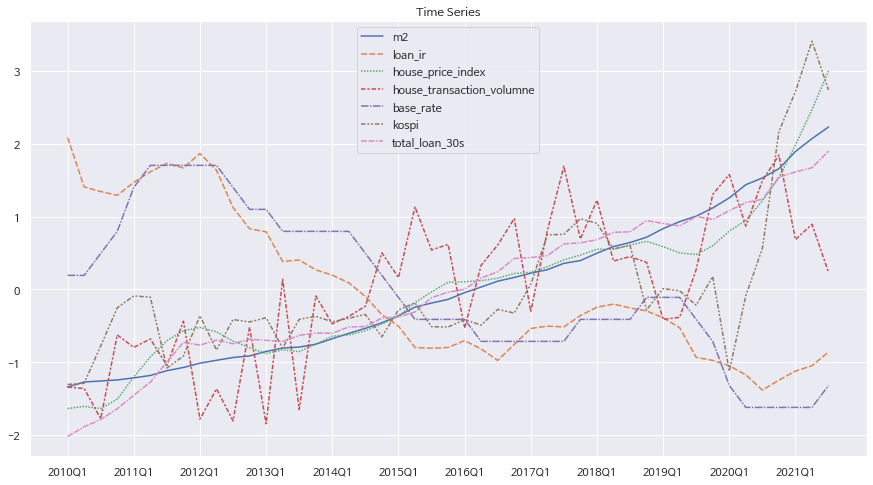

In [17]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## Lag order selection

In [18]:
lag_order = select_order(data=df, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,67.36,71.05,2.153e+29,68.65
1,64.93,70.78,3.632e+28,66.97
2,61.49,69.50,7.277e+27,64.29
3,15.91,26.07,7.394e+10,19.46
4,-207.3,-195.0,-1.438e-88*,-203.0
5,-208.1,-193.6,-6.766e-93,-203.0
6,-210.7,-194.1,-1.788e-96,-204.9
7,-189.8,-171.0,-2.466e-89,-183.2
8,-274.0,-253.0,-1.307e-127,-266.7
9,-282.0*,-258.9*,-1.124e-132,-273.9*


In [19]:
lag_order = select_order(data=df, maxlags=10, deterministic='li', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,66.51,70.21,9.272e+28,67.80
1,63.90,69.75,1.299e+28,65.95
2,59.79,67.79,1.320e+27,62.58
3,-76.81,-66.65,3.984e-30,-73.26
4,-204.0,-191.7,-3.898e-87*,-199.7
5,-203.4,-189.0,-7.229e-91,-198.4
6,-203.7,-187.0,-2.128e-93,-197.8
7,-188.3,-169.5,-1.087e-88,-181.8
8,-272.1,-251.1,-8.614e-127,-264.8
9,-284.5*,-261.4*,-8.980e-134,-276.4*


In [20]:
lag_order = select_order(data=df, maxlags=10, deterministic='lo', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,66.51,70.21,9.272e+28,67.80
1,63.90,69.75,1.299e+28,65.95
2,59.79,67.79,1.320e+27,62.58
3,-76.81,-66.65,3.984e-30,-73.26
4,-204.0,-191.7,-3.898e-87*,-199.7
5,-203.4,-189.0,-7.229e-91,-198.4
6,-203.7,-187.0,-2.128e-93,-197.8
7,-188.3,-169.5,-1.087e-88,-181.8
8,-272.1,-251.1,-8.614e-127,-264.8
9,-284.5*,-261.4*,-8.980e-134,-276.4*


## Cointegration rank

In [21]:
rank_test = select_coint_rank(df, 1, 4, method="trace",
                              signif=0.05)
rank_test.rank

6

In [22]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,7,1788.,139.3
1,7,445.0,107.3
2,7,250.7,79.34
3,7,146.9,55.25
4,7,84.62,35.01
5,7,31.94,18.40
6,7,0.004617,3.841


## Parameter estimation

In [30]:
model = VECM(df,
             k_ar_diff=4,
             coint_rank=6,
             deterministic='lo',
             seasons=4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [31]:
vecm_res = model.fit()

In [32]:
vecm_res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/vector_ar/vecm.py:1362: RuntimeWarning: invalid value encountered in sqrt
  last_rows_1d = np.sqrt(np.diag(mat1.dot(mat2)))


,coef,std err,z,P>|z|,[0.025,0.975]
season1,2107.2766,6472.136,0.326,0.745,-1.06e+04,1.48e+04
season2,3.318e+04,8162.077,4.065,0.000,1.72e+04,4.92e+04
season3,3.274e+04,7260.331,4.510,0.000,1.85e+04,4.7e+04
lin_trend,3.257e+04,7980.570,4.082,0.000,1.69e+04,4.82e+04
L1.m2,-1.0458,0.197,-5.317,0.000,-1.431,-0.660
L1.loan_ir,-3.772e+04,1.44e+04,-2.622,0.009,-6.59e+04,-9518.873
L1.house_price_index,-1.916e+04,1.17e+04,-1.632,0.103,-4.22e+04,3847.287
L1.house_transaction_volumne,0.6123,0.177,3.455,0.001,0.265,0.960
L1.base_rate,-8.061e+04,1.72e+04,-4.686,0.000,-1.14e+05,-4.69e+04
L1.kospi,-88.9540,39.910,-2.229,0.026,-167.176,-10.732


## Forecasts

In [33]:
vecm_res.predict(steps=5)

array([[ 3.62274446e+06,  3.99133693e+00,  1.05228632e+02,
         1.67060592e+05,  1.59830283e+00,  3.78434058e+03,
         9.51023692e+07],
       [ 3.71089079e+06,  4.95650146e+00,  1.07567428e+02,
        -2.02458456e+05,  2.70967927e+00,  2.82795784e+03,
         8.56430603e+07],
       [ 3.83942243e+06,  4.77921689e+00,  1.08068214e+02,
        -4.91017462e+05,  4.04249525e+00,  3.17607074e+03,
         7.33938662e+07],
       [ 4.09599403e+06,  4.48007215e+00,  1.09935237e+02,
        -5.90125546e+05,  5.00953298e+00,  4.11369410e+03,
         5.31873482e+07],
       [ 4.39645874e+06,  3.84973261e+00,  1.14501882e+02,
        -7.03518026e+05,  5.77598816e+00,  4.61018709e+03,
         3.61159270e+07]])

In [34]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[ 3.62274446e+06  3.99133693e+00  1.05228632e+02  1.67060592e+05
   1.59830283e+00  3.78434058e+03  9.51023692e+07]
 [ 3.71089079e+06  4.95650146e+00  1.07567428e+02 -2.02458456e+05
   2.70967927e+00  2.82795784e+03  8.56430603e+07]
 [ 3.83942243e+06  4.77921689e+00  1.08068214e+02 -4.91017462e+05
   4.04249525e+00  3.17607074e+03  7.33938662e+07]
 [ 4.09599403e+06  4.48007215e+00  1.09935237e+02 -5.90125546e+05
   5.00953298e+00  4.11369410e+03  5.31873482e+07]
 [ 4.39645874e+06  3.84973261e+00  1.14501882e+02 -7.03518026e+05
   5.77598816e+00  4.61018709e+03  3.61159270e+07]]
lower:
[[ 3.61496967e+06  3.95845014e+00  1.05149691e+02  1.41632527e+05
   1.53216541e+00  3.74945881e+03  9.44171843e+07]
 [ 3.70234984e+06  4.88789587e+00  1.07478710e+02 -2.38624394e+05
   2.63849151e+00  2.78085520e+03  8.48828870e+07]
 [ 3.83000180e+06  4.70876411e+00  1.07885379e+02 -5.31562782e+05
   3.96625096e+00  3.08037744e+03  7.26135961e+07]
 [ 4.08504826e+06  4.39796725e+00  1.09606005e

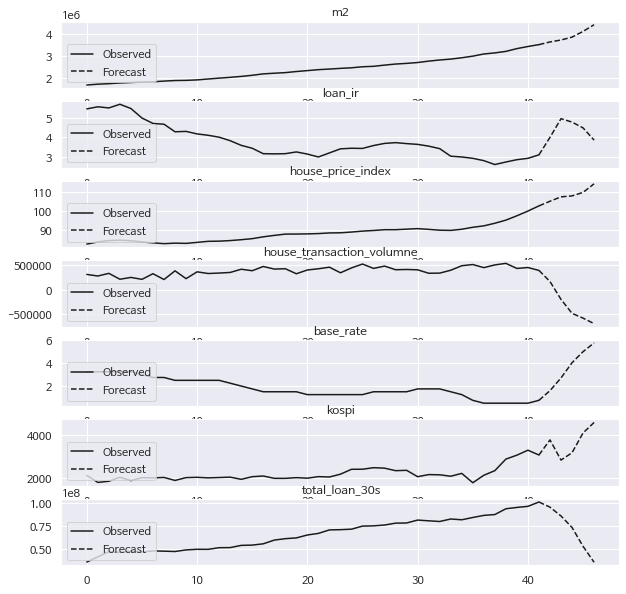

In [35]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

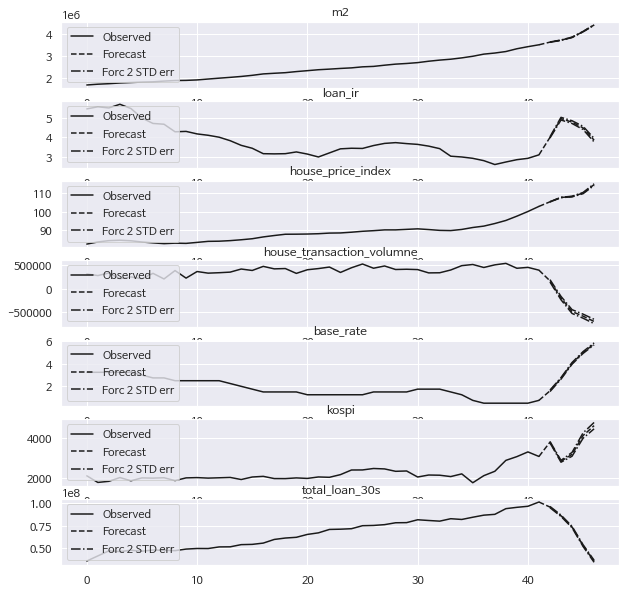

In [36]:
vecm_res.plot_forecast(steps=5, plot_conf_int=True)

## Structural analysis

### Granger causality

In [37]:
granger_results = vecm_res.test_granger_causality(caused="total_loan_30s", causing='base_rate', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
-3958.,nan,NAN,"(5, -35)"


In [38]:
granger_results = vecm_res.test_granger_causality(caused="total_loan_30s", causing='kospi', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
1.291e+05,nan,NAN,"(5, -35)"


In [39]:
granger_results = vecm_res.test_granger_causality(caused="total_loan_30s", causing='house_price_index', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
-3.599e+04,nan,NAN,"(5, -35)"


In [43]:
granger_results = vecm_res.test_granger_causality(caused="total_loan_30s", causing='loan_ir', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
1796.,nan,NAN,"(5, -35)"


### Instantaneous causality

In [40]:
inst_caus_base_rate = vecm_res.test_inst_causality(causing="base_rate")
inst_caus_base_rate.summary()

Test statistic,Critical value,p-value,df
-76.96,12.59,1.000,6


In [41]:
inst_caus_base_rate = vecm_res.test_inst_causality(causing="house_price_index")
inst_caus_base_rate.summary()

Test statistic,Critical value,p-value,df
-8.632,12.59,1.000,6


### Impulse response analysis

In [45]:
num_periods = 3
ir = vecm_res.irf(periods=num_periods)
ir.plot(plot_stderr=False)

LinAlgError: ignored

## Diagnostics

### Testing for nonormality

In [46]:
norm_test = vecm_res.test_normality()
norm_test.summary()

LinAlgError: ignored

### Checking for residual autocorrelation

In [47]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
1.401e+06,394.6,0.000,350


# 30대 대출합계 VECM: lag 3


In [64]:
import numpy as np
from statsmodels.tsa.vector_ar.vecm import *

## Data load

In [65]:
df = pd.read_csv('data/all_macro_data.csv', index_col=0)

In [66]:
data = pd.read_csv('data/2110059_20220113180614.csv')
df['total_loan_30s'] = data[data['연령대'] == '30대'].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

In [67]:
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

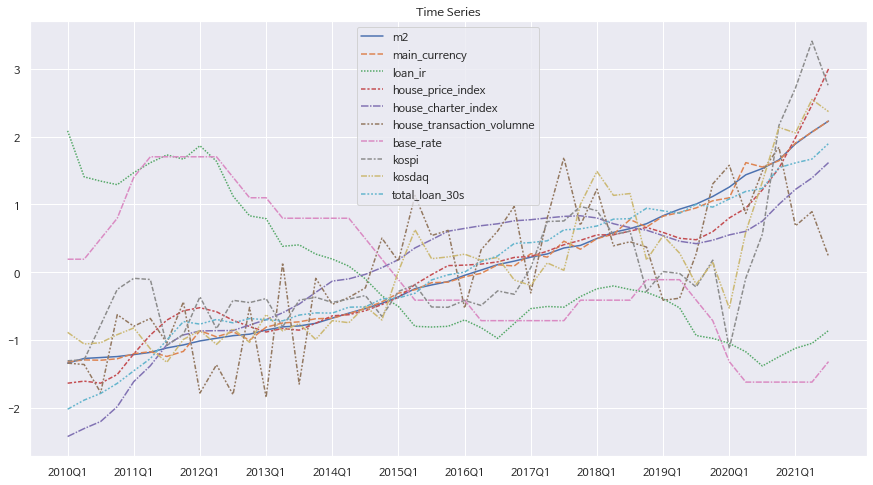

In [68]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [69]:
df = df.drop(columns=['main_currency', 'house_charter_index', 'kosdaq'])

In [70]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

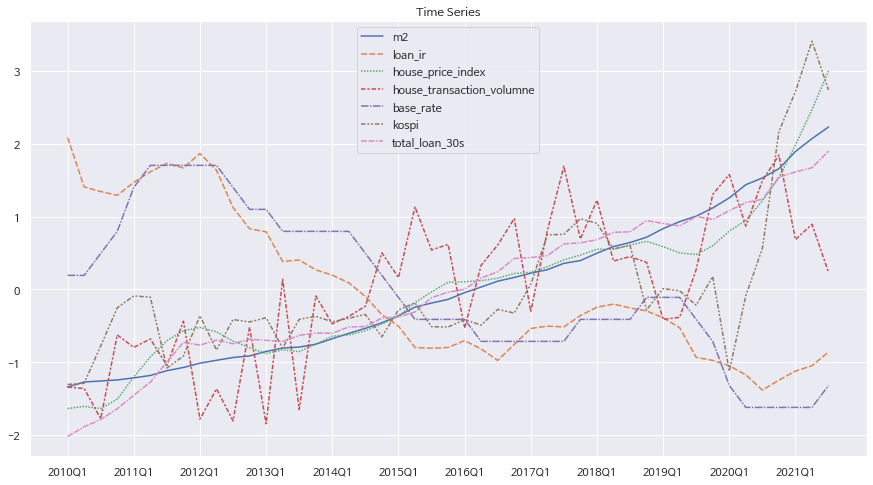

In [71]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## Lag order selection

In [76]:
lag_order = select_order(data=df, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,67.36,71.05,2.153e+29,68.65
1,64.93,70.78,3.632e+28,66.97
2,61.49,69.50,7.277e+27,64.29
3,15.91,26.07,7.394e+10,19.46
4,-207.3,-195.0,-1.438e-88*,-203.0
5,-208.1,-193.6,-6.766e-93,-203.0
6,-210.7,-194.1,-1.788e-96,-204.9
7,-189.8,-171.0,-2.466e-89,-183.2
8,-274.0,-253.0,-1.307e-127,-266.7
9,-282.0*,-258.9*,-1.124e-132,-273.9*


In [77]:
lag_order = select_order(data=df, maxlags=10, deterministic='li', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,66.51,70.21,9.272e+28,67.80
1,63.90,69.75,1.299e+28,65.95
2,59.79,67.79,1.320e+27,62.58
3,-76.81,-66.65,3.984e-30,-73.26
4,-204.0,-191.7,-3.898e-87*,-199.7
5,-203.4,-189.0,-7.229e-91,-198.4
6,-203.7,-187.0,-2.128e-93,-197.8
7,-188.3,-169.5,-1.087e-88,-181.8
8,-272.1,-251.1,-8.614e-127,-264.8
9,-284.5*,-261.4*,-8.980e-134,-276.4*


In [78]:
lag_order = select_order(data=df, maxlags=10, deterministic='lo', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,66.51,70.21,9.272e+28,67.80
1,63.90,69.75,1.299e+28,65.95
2,59.79,67.79,1.320e+27,62.58
3,-76.81,-66.65,3.984e-30,-73.26
4,-204.0,-191.7,-3.898e-87*,-199.7
5,-203.4,-189.0,-7.229e-91,-198.4
6,-203.7,-187.0,-2.128e-93,-197.8
7,-188.3,-169.5,-1.087e-88,-181.8
8,-272.1,-251.1,-8.614e-127,-264.8
9,-284.5*,-261.4*,-8.980e-134,-276.4*


## Cointegration rank

In [79]:
rank_test = select_coint_rank(df, 1, 3, method="trace",
                              signif=0.05)
rank_test.rank

5

In [80]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,7,350.0,139.3
1,7,222.7,107.3
2,7,136.7,79.34
3,7,81.07,55.25
4,7,38.10,35.01
5,7,18.00,18.40


## Parameter estimation

In [81]:
model = VECM(df,
             k_ar_diff=3,
             coint_rank=5,
             deterministic='lo',
             seasons=4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [82]:
vecm_res = model.fit()

In [83]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,1.888e+04,4396.168,4.294,0.000,1.03e+04,2.75e+04
season2,2.808e+04,5886.936,4.769,0.000,1.65e+04,3.96e+04
season3,2.046e+04,5757.728,3.554,0.000,9178.675,3.17e+04
lin_trend,1.279e+04,3325.824,3.844,0.000,6267.469,1.93e+04
L1.m2,-0.8552,0.168,-5.091,0.000,-1.184,-0.526
L1.loan_ir,-3.82e+04,1.63e+04,-2.344,0.019,-7.01e+04,-6260.283
L1.house_price_index,-2348.8231,9068.416,-0.259,0.796,-2.01e+04,1.54e+04
L1.house_transaction_volumne,0.1596,0.086,1.852,0.064,-0.009,0.328
L1.base_rate,-7.31e+04,1.4e+04,-5.229,0.000,-1e+05,-4.57e+04
L1.kospi,-46.7513,21.604,-2.164,0.030,-89.095,-4.408


## Forecasts

In [84]:
vecm_res.predict(steps=5)

array([[3.61299130e+06, 3.45185112e+00, 1.04460464e+02, 2.45961203e+05,
        1.44398907e+00, 2.93630365e+03, 1.02647899e+08],
       [3.70070333e+06, 3.73137219e+00, 1.05391339e+02, 1.37618898e+05,
        1.64065133e+00, 2.43038937e+03, 1.01811643e+08],
       [3.78850900e+06, 3.86593520e+00, 1.04938780e+02, 4.76804554e+04,
        1.78819325e+00, 2.24897471e+03, 1.03442130e+08],
       [3.86755019e+06, 3.72194491e+00, 1.04847933e+02, 1.67165899e+05,
        1.58506212e+00, 1.82514298e+03, 1.01969967e+08],
       [3.94677759e+06, 3.66976640e+00, 1.04760025e+02, 3.35554741e+05,
        1.14202166e+00, 1.40021749e+03, 1.04276633e+08]])

In [85]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[3.61299130e+06 3.45185112e+00 1.04460464e+02 2.45961203e+05
  1.44398907e+00 2.93630365e+03 1.02647899e+08]
 [3.70070333e+06 3.73137219e+00 1.05391339e+02 1.37618898e+05
  1.64065133e+00 2.43038937e+03 1.01811643e+08]
 [3.78850900e+06 3.86593520e+00 1.04938780e+02 4.76804554e+04
  1.78819325e+00 2.24897471e+03 1.03442130e+08]
 [3.86755019e+06 3.72194491e+00 1.04847933e+02 1.67165899e+05
  1.58506212e+00 1.82514298e+03 1.01969967e+08]
 [3.94677759e+06 3.66976640e+00 1.04760025e+02 3.35554741e+05
  1.14202166e+00 1.40021749e+03 1.04276633e+08]]
lower:
[[ 3.60233902e+06  3.38213089e+00  1.04301210e+02  1.98892042e+05
   1.33617639e+00  2.81227244e+03  1.01480730e+08]
 [ 3.68623825e+06  3.60817466e+00  1.04975543e+02  8.26260236e+04
   1.50723014e+00  2.19037119e+03  1.00414191e+08]
 [ 3.76977362e+06  3.70809288e+00  1.04016294e+02 -1.50357769e+04
   1.61529185e+00  1.93042155e+03  1.01815375e+08]
 [ 3.83786848e+06  3.53550638e+00  1.03349038e+02  1.00288345e+05
   1.35229964e+

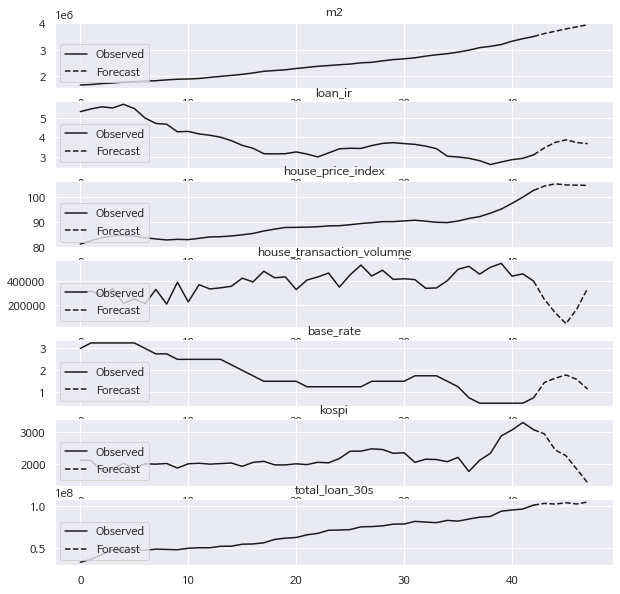

In [86]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

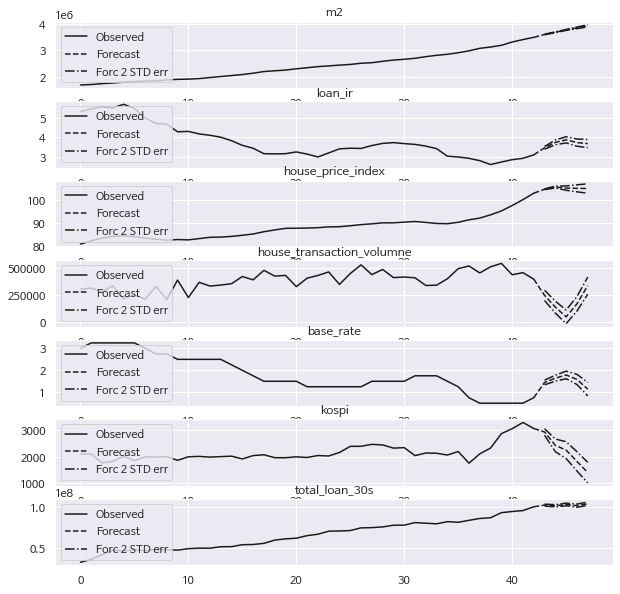

In [87]:
vecm_res.plot_forecast(steps=5, plot_conf_int=True)

## Structural analysis

### Granger causality

In [88]:
granger_results = vecm_res.test_granger_causality(caused="total_loan_30s", causing='base_rate', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
1.275,2.840,0.311,"(4, 21)"


In [89]:
granger_results = vecm_res.test_granger_causality(caused="total_loan_30s", causing='kospi', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
7.104,2.840,0.001,"(4, 21)"


In [90]:
granger_results = vecm_res.test_granger_causality(caused="total_loan_30s", causing='house_price_index', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
5.010,2.840,0.005,"(4, 21)"


In [91]:
granger_results = vecm_res.test_granger_causality(caused="total_loan_30s", causing='loan_ir', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
5.677,2.840,0.003,"(4, 21)"


### Instantaneous causality

In [92]:
inst_caus_base_rate = vecm_res.test_inst_causality(causing="base_rate")
inst_caus_base_rate.summary()

Test statistic,Critical value,p-value,df
18.43,12.59,0.005,6


In [93]:
inst_caus_base_rate = vecm_res.test_inst_causality(causing="house_price_index")
inst_caus_base_rate.summary()

Test statistic,Critical value,p-value,df
17.94,12.59,0.006,6


### Impulse response analysis

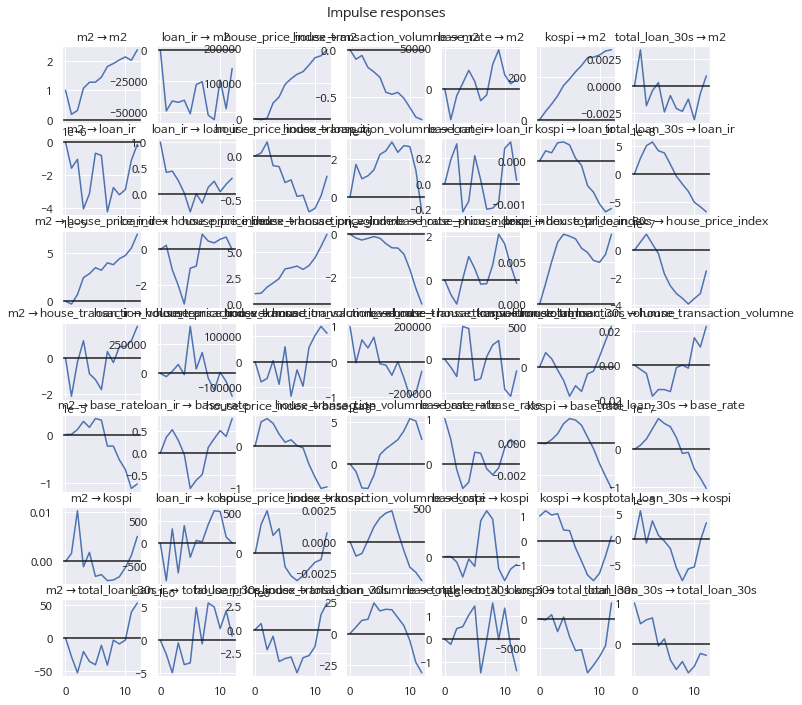

In [101]:
num_periods = 12
ir = vecm_res.irf(periods=num_periods)
ir.plot(plot_stderr=False)
None

## Diagnostics

### Testing for nonormality

In [102]:
norm_test = vecm_res.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
8.994,23.68,0.831,14


### Checking for residual autocorrelation

In [103]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
967.3,454.0,0.000,406
